In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
summary_df = pd.read_csv('summary.csv', index_col=0)
summary_df['Gap(CGSP-CGMP)'] = summary_df['ObjVal(CGSP)'] - summary_df['ObjVal(CGMP)']
summary_df['Gap(CGSP-CGMPSub)'] = summary_df['ObjVal(CGSP)'] - summary_df['ObjVal(CGMPSub)']
summary_df['Gap(CGMP-CGMPSub)'] = summary_df['ObjVal(CGMP)'] - summary_df['ObjVal(CGMPSub)']

summary_df['TimeGap(GB-CGSP)'] = summary_df['Time(GB)'] - summary_df['Time(CGSP)']
summary_df['TimeGap(GB-CGMP)'] = summary_df['Time(GB)'] - summary_df['Time(CGMP)']
summary_df['TimeGap(GB-CGMPSub)'] = summary_df['Time(GB)'] - summary_df['Time(CGMPSub)']

summary_df['TimeGap(CGSP-CGMP)'] = summary_df['Time(CGSP)'] - summary_df['Time(CGMP)']
summary_df['TimeGap(CGSP-CGMPSub)'] = summary_df['Time(CGSP)'] - summary_df['Time(CGMPSub)']
summary_df['TimeGap(CGMP-CGMPSub)'] = summary_df['Time(CGMP)'] - summary_df['Time(CGMPSub)']

summary_df.head()

,N,M,ObjVal(GB),ObjVal(CGSP),ObjVal(CGMP),ObjVal(CGMPSub),nCols(GB),nCols(CGSP),nCols(CGMP),nCols(CGMPSub),...,Gap(GB-CGMPSub),Gap(CGSP-CGMP),Gap(CGSP-CGMPSub),Gap(CGMP-CGMPSub),TimeGap(GB-CGSP),TimeGap(GB-CGMP),TimeGap(GB-CGMPSub),TimeGap(CGSP-CGMP),TimeGap(CGSP-CGMPSub),TimeGap(CGMP-CGMPSub)
Instance,,,,,,,,,,,,,,,,,,,,,
1,2,2,0.0000,0.0000,0.0000,0.0000,6,4,10,4,...,0.000000e+00,0.0,0.0,0.0,-0.041852,-0.040752,-0.055518,0.001100,-0.013665,-0.014765
2,2,3,0.0001,0.0001,0.0001,0.0001,6,5,5,5,...,-1.110223e-16,0.0,0.0,0.0,-0.047642,-0.021150,-0.035462,0.026492,0.012180,-0.014312
3,2,4,0.0146,0.0146,0.0146,0.0146,6,5,10,5,...,0.000000e+00,0.0,0.0,0.0,-0.055543,-0.035817,-0.063288,0.019726,-0.007745,-0.027471
4,3,2,0.0001,0.0001,0.0001,0.0001,24,5,10,5,...,-5.551115e-17,0.0,0.0,0.0,-0.075911,-0.058659,-0.079229,0.017252,-0.003318,-0.020569
5,3,3,0.0001,0.0001,0.0001,0.0001,24,6,10,6,...,0.000000e+00,0.0,0.0,0.0,-0.248422,-0.085588,-0.083208,0.162834,0.165214,0.002381


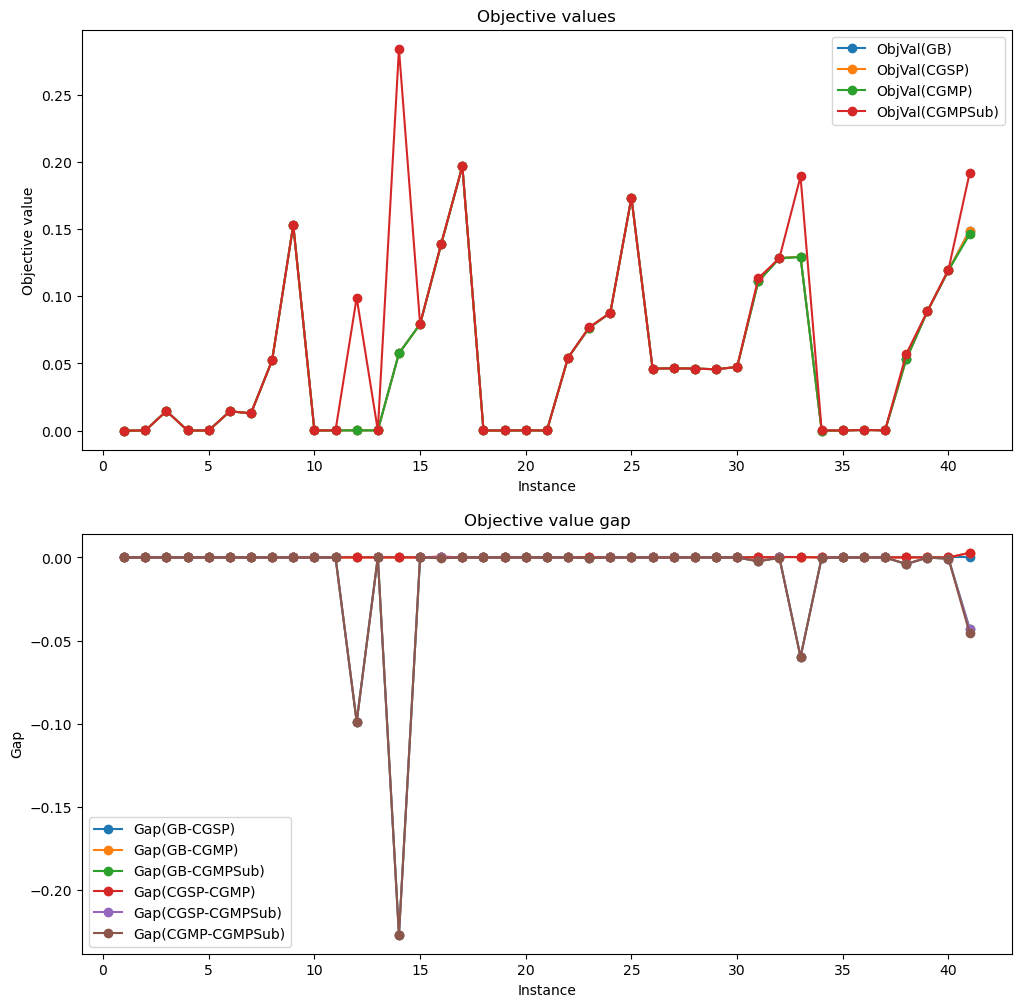

In [3]:
# Plot objective values and gaps
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

summary_df[['ObjVal(GB)', 'ObjVal(CGSP)', 'ObjVal(CGMP)', 'ObjVal(CGMPSub)']].plot(ax=ax[0], marker='o')
ax[0].set_title('Objective values')
ax[0].set_xlabel('Instance')
ax[0].set_ylabel('Objective value')

summary_df[['Gap(GB-CGSP)', 'Gap(GB-CGMP)', 'Gap(GB-CGMPSub)', 'Gap(CGSP-CGMP)', 'Gap(CGSP-CGMPSub)', 'Gap(CGMP-CGMPSub)']].plot(ax=ax[1], marker='o')
ax[1].set_title('Objective value gap')
ax[1].set_xlabel('Instance')
ax[1].set_ylabel('Gap')

plt.show()

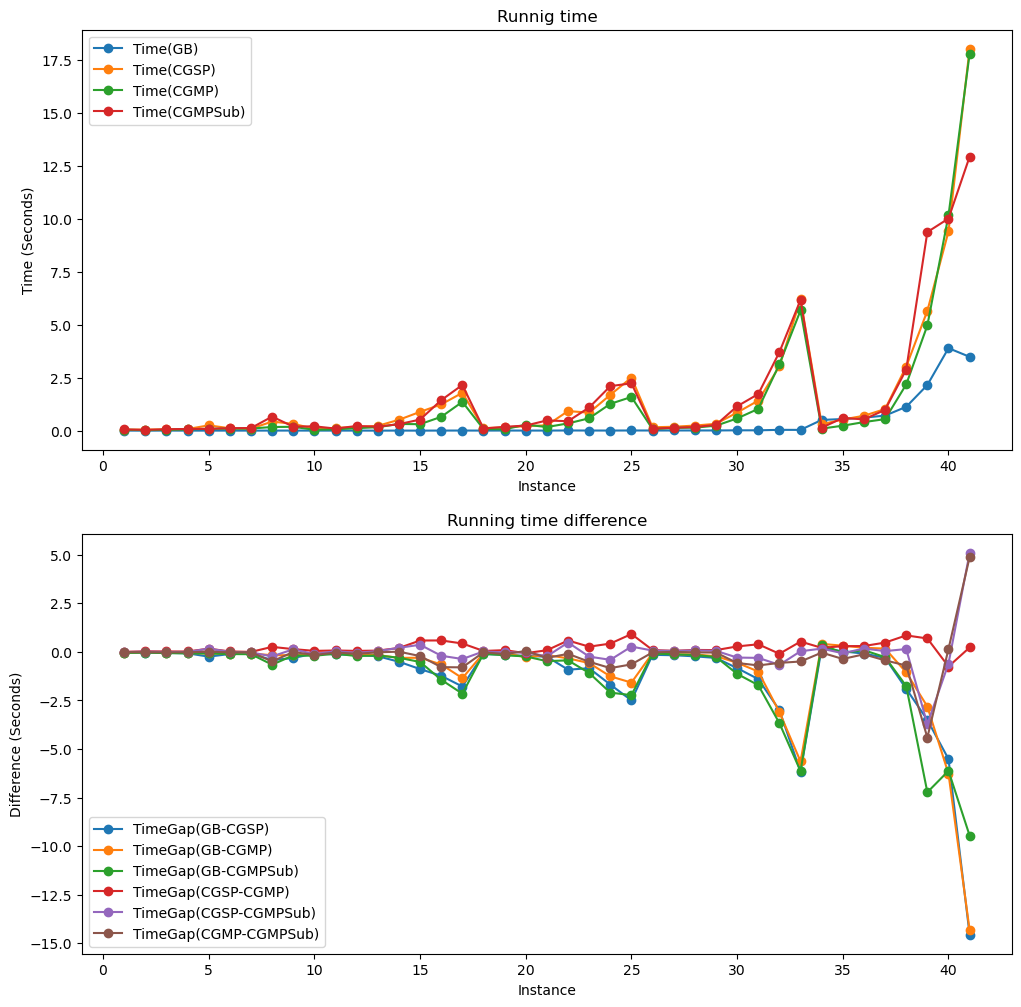

In [4]:
# Plot time and gaps
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

summary_df[['Time(GB)', 'Time(CGSP)', 'Time(CGMP)', 'Time(CGMPSub)']].plot(ax=ax[0], marker='o')
ax[0].set_title('Runnig time')
ax[0].set_xlabel('Instance')
ax[0].set_ylabel('Time (Seconds)')

summary_df[['TimeGap(GB-CGSP)', 'TimeGap(GB-CGMP)', 'TimeGap(GB-CGMPSub)', 'TimeGap(CGSP-CGMP)', 'TimeGap(CGSP-CGMPSub)', 'TimeGap(CGMP-CGMPSub)']].plot(ax=ax[1], marker='o')
ax[1].set_title('Running time difference')
ax[1].set_xlabel('Instance')
ax[1].set_ylabel('Difference (Seconds)')

plt.show()

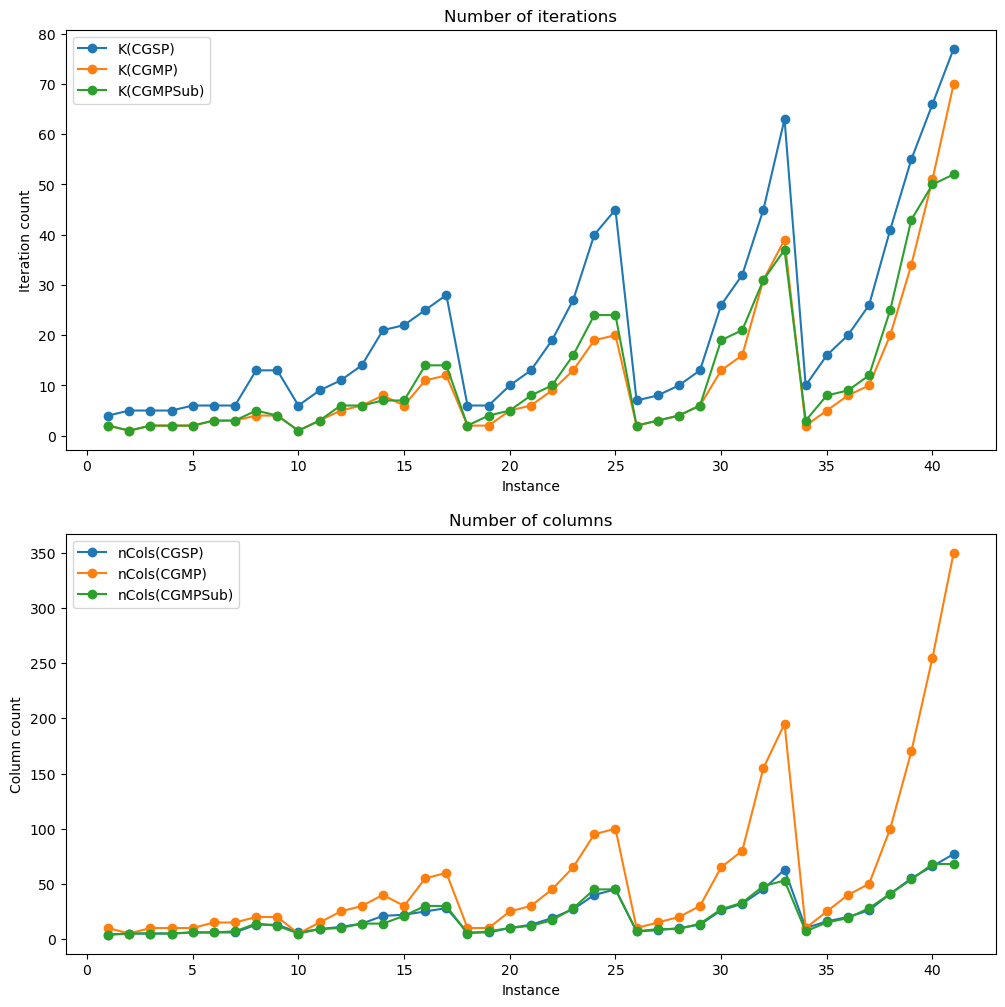

In [5]:
# Plot number of iterations and number of permutations
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

summary_df[['K(CGSP)', 'K(CGMP)', 'K(CGMPSub)']].plot(ax=ax[0], marker='o')
ax[0].set_title('Number of iterations')
ax[0].set_xlabel('Instance')
ax[0].set_ylabel('Iteration count')

# summary_df[['nCols(GB)', 'nCols(CGSP)', 'nCols(CGMP)', 'nCols(CGMPSub)']].plot(ax=ax[1], marker='o')
summary_df[['nCols(CGSP)', 'nCols(CGMP)', 'nCols(CGMPSub)']].plot(ax=ax[1], marker='o')
ax[1].set_title('Number of columns')
ax[1].set_xlabel('Instance')
ax[1].set_ylabel('Column count')

plt.show()